In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import pygenesys as pg
from plotter import *
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,12)

In [2]:
sim_path = "simulations/uiuc/data_files/UIUC_UIUC_SLACK01_52.sqlite"

conn = sqlite3.connect(sim_path)
cursor = conn.cursor()

sc = "UIUC_SLACK01"

/home/sdotson/research/2021-dotson-ms/plotter.py:284: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(axes, labels=techs, loc='right',bbox_to_anchor=(1.3, 0.75), fontsize=21)


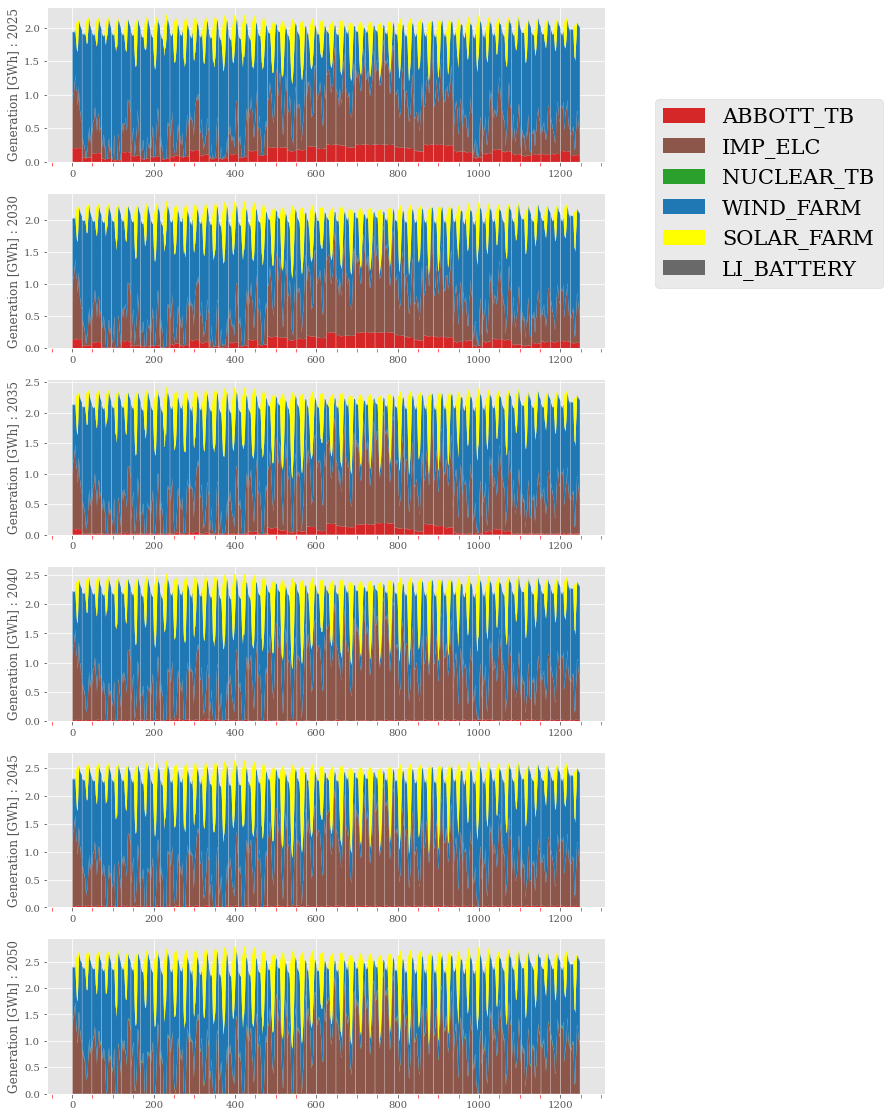

In [10]:
plot_electricity_profiles(conn,'UIUC','ELC', scenario=sc)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.use("pgf")
plt.rcParams['pgf.texsystem'] = 'pdflatex'
plt.rcParams['pgf.rcfonts'] = False
plt.rcParams['figure.edgecolor'] = 'k'
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['savefig.dpi'] = 400
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"

<ipython-input-23-6be3b319232a>:13: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-23-6be3b319232a>:26: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


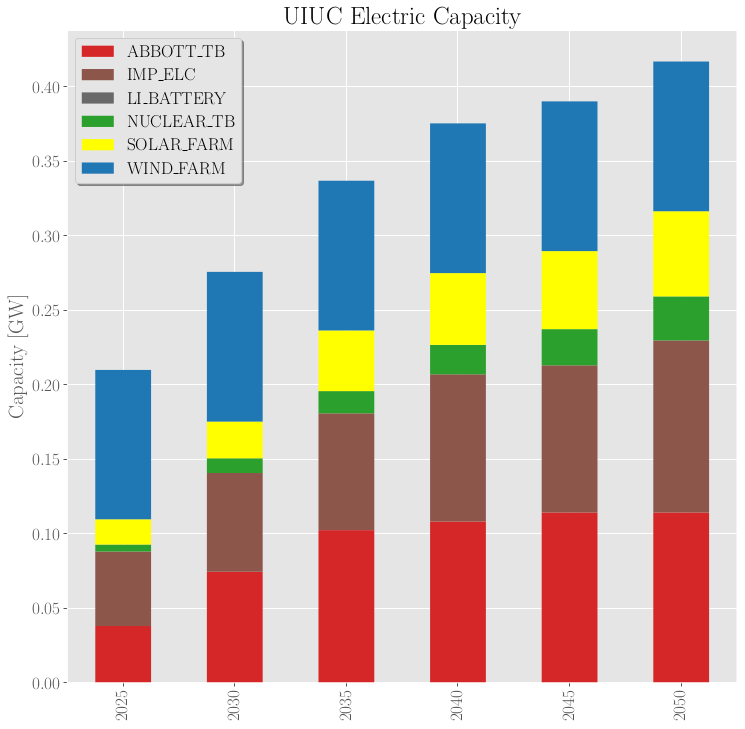

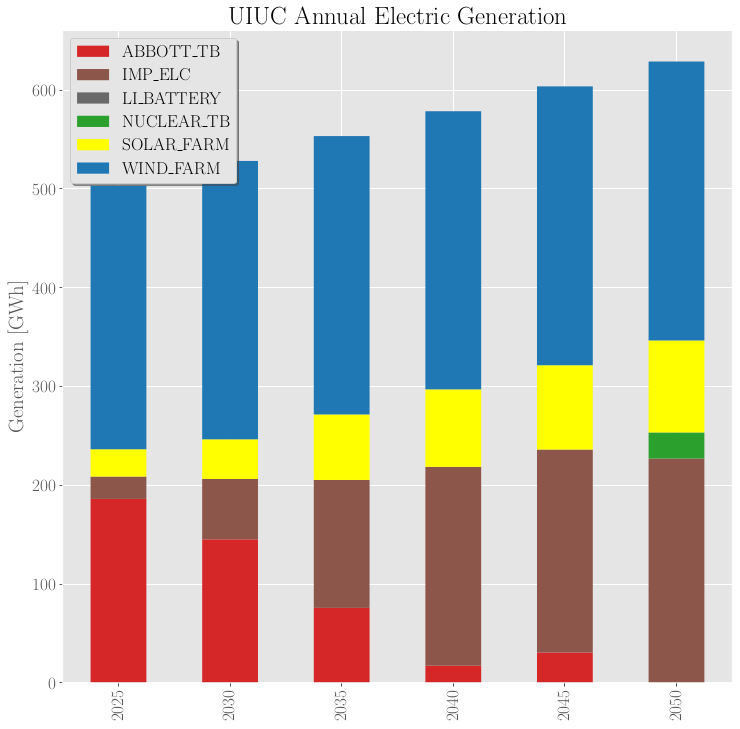

In [23]:
cap_df = get_annual_capacity(conn, 'UIUC', 'ELC', scenario=sc)
(cap_df/1000).plot(kind='bar', stacked=True, color=elc_colors)
plt.title('UIUC Electric Capacity', fontsize=24)
plt.ylabel('Capacity [GW]', fontsize=20)
# plt.minorticks_on()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('')
# plt.legend(fontsize=16, shadow=True, fancybox=True, loc=(1.05,0.5))
plt.legend(fontsize=16, shadow=True, fancybox=True)
# plt.tight_layout()
plt.savefig('thesis/figures/uiuc_elc_cap.pgf')
plt.show()
gen_df = get_annual_generation(conn, 'UIUC', 'ELC', scenario=sc)
(gen_df).plot(kind='bar', stacked=True, color=elc_colors)
plt.title('UIUC Annual Electric Generation', fontsize=24)
plt.ylabel('Generation [GWh]', fontsize=20)
# plt.minorticks_on()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('')
# plt.legend(fontsize=16, shadow=True, fancybox=True, loc=(1.05,0.5))
plt.legend(fontsize=16, shadow=True, fancybox=True)
# plt.tight_layout()
plt.savefig('thesis/figures/uiuc_elc_gen.pgf')
plt.show()

<ipython-input-8-af9764555c62>:13: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


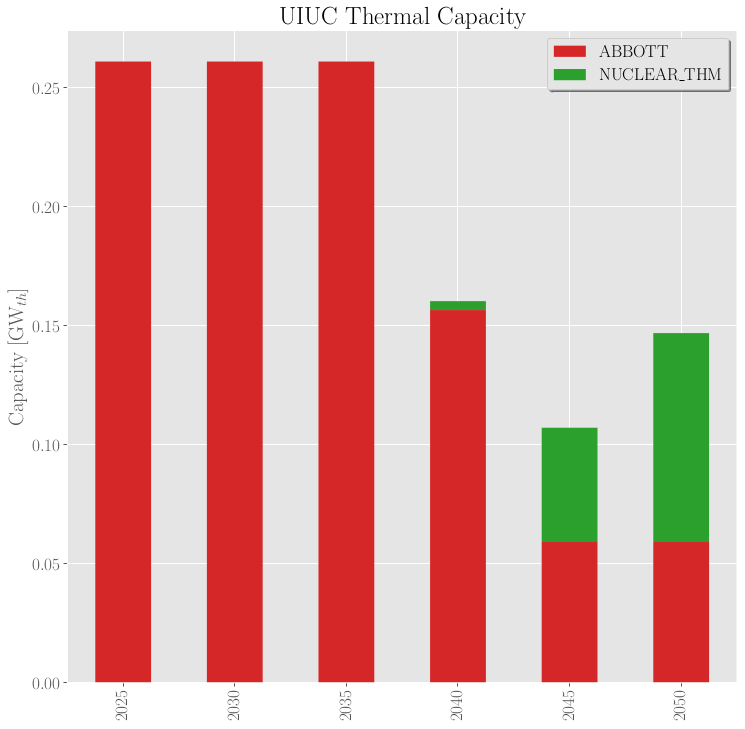

In [8]:
cap_df = get_annual_capacity(conn, 'UIUC', ['STM','NUC_STM'], scenario=sc)
(cap_df/1000).plot(kind='bar', stacked=True, color=elc_colors)
plt.title('UIUC Thermal Capacity', fontsize=24)
plt.ylabel(r'Capacity [GW$_{th}$]', fontsize=20)
# plt.minorticks_on()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('')
# plt.legend(fontsize=16, shadow=True, fancybox=True, loc=(1.05,0.5))
plt.legend(fontsize=16, shadow=True, fancybox=True)
# plt.tight_layout()
plt.savefig('thesis/figures/uiuc_thm_cap.pgf')
plt.show()
# gen_df = get_annual_generation(conn, 'UIUC', 'ELC', scenario=sc)
# (gen_df).plot(kind='bar', stacked=True, color=elc_colors)
# plt.title('UIUC Annual Electric Generation', fontsize=24)
# plt.ylabel('Generation [GWh]', fontsize=20)
# # plt.minorticks_on()
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
# plt.xlabel('')
# # plt.legend(fontsize=16, shadow=True, fancybox=True, loc=(1.05,0.5))
# plt.legend(fontsize=16, shadow=True, fancybox=True)
# # plt.tight_layout()
# plt.savefig('thesis/figures/uiuc_elc_gen.pgf')
# plt.show()

<ipython-input-9-2b082fbf5e91>:13: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


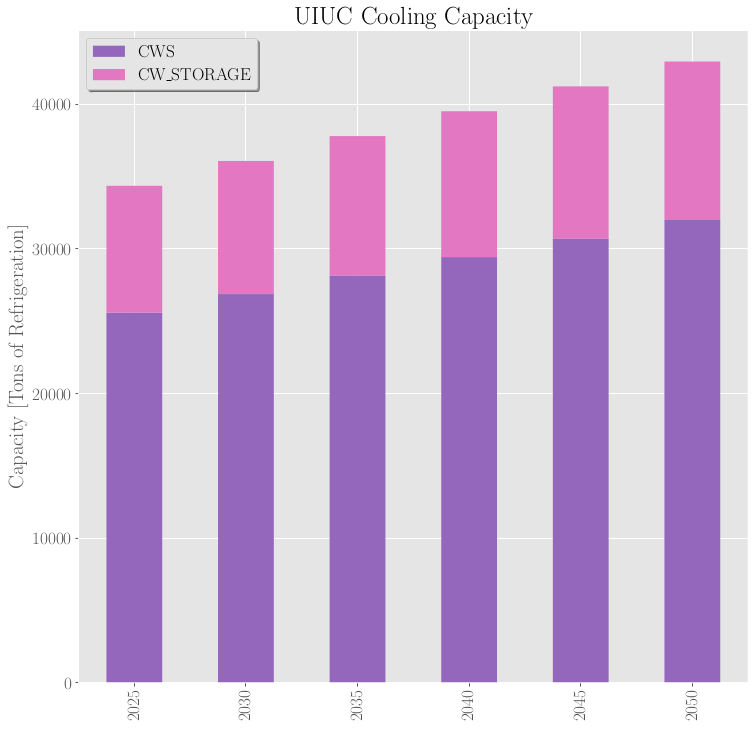

In [9]:
cap_df = get_annual_capacity(conn, 'UIUC', 'CHW', scenario=sc)
(cap_df).plot(kind='bar', stacked=True, color=elc_colors)
plt.title('UIUC Cooling Capacity', fontsize=24)
plt.ylabel(r'Capacity [Tons of Refrigeration]', fontsize=20)
# plt.minorticks_on()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('')
# plt.legend(fontsize=16, shadow=True, fancybox=True, loc=(1.05,0.5))
plt.legend(fontsize=16, shadow=True, fancybox=True)
# plt.tight_layout()
plt.savefig('thesis/figures/uiuc_chw_cap.pgf')
plt.show()
# gen_df = get_annual_generation(conn, 'UIUC', 'ELC', scenario=sc)
# (gen_df).plot(kind='bar', stacked=True, color=elc_colors)
# plt.title('UIUC Annual Electric Generation', fontsize=24)
# plt.ylabel('Generation [GWh]', fontsize=20)
# # plt.minorticks_on()
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
# plt.xlabel('')
# # plt.legend(fontsize=16, shadow=True, fancybox=True, loc=(1.05,0.5))
# plt.legend(fontsize=16, shadow=True, fancybox=True)
# # plt.tight_layout()
# plt.savefig('thesis/figures/uiuc_elc_gen.pgf')
# plt.show()